<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data Visualization</center>  

# Challenge: Tipos de Gráficos
## Caso : Sample Orders 


# 0. Objetivo

El objetivo de este worksheet es prácticar sobre los principiales tipos de gráficos que podemos utilizar en Data Science para ** analizar la relación entre nuestros datos**  y **responder preguntas** . 

No nos olvidemos que en Data Visualization vamos a buscar:

* **Explorar**
* **Explicar**

nuestros datos




# 1. Visión general del problema.

Nuestra empresa ACME, nos ha proporcionado las ordenes de ventas de nuestros productos 



In [2]:
## importing the necessary packages
%matplotlib inline
import  numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Obtención de los datos

Antes de importar los datos vamos a definir una serie de parámetros que aplicaremos a todos los gráficos. 

Estos pueden ser reescritos en cada gráfico. 



In [3]:
# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired

# Plot size to 14" x 7"
plt.rc('figure', figsize = (8, 5))
# Font size to 14
plt.rc('font', size = 14)
# Do not display top and right frame lines
plt.rc('axes.spines', top = False, right = False)
# Remove grid lines
plt.rc('axes', grid = False)
# Set backgound color to white
plt.rc('axes', facecolor = 'white')


Esta vez va a ser fácil, vamos a importar los datos de un fichero csv, utilizaremos la función read_csv que nos proporciona la libreria de pandas.


In [4]:
data_path = 'orders.csv'
df_datos = pd.read_csv(data_path)

df_datos['order_Dte'] = pd.to_datetime(df_datos['order_Dte']) # Tratamiento para fechas

Vamos a responder a nuestra primera pregunta 
## P.0 ¿hemos cargado bien los datos?

Vamos a responder con una tabla

In [5]:
df_datos.head()

,order_id,Priority,Cust_id,Segment,City,Category,Subcategory,Container,Profit,Quantity,Sales,Mode,order_Dte,Mnth,Year,Quarter
0,9285,Critical,949,Consumer,Dortmund,Office Supplies,Accessories,Small Box,-18,3,122,Regular Air,2013-01-01,1,2013,2013Q1
1,88028,Not Specified,2211,HomeOffice,Pretoria,Office Supplies,Storage,Large Box,-411,2,186,Express Air,2013-01-01,1,2013,2013Q1
2,88296,High,2579,HomeOffice,Charleston,Furniture,Tables,Jumbo Box,-265,1,204,Delivery Truck,2013-02-01,1,2013,2013Q1
3,89536,Critical,890,Consumer,Voronezh,Technology,Telephones,Small Box,440,6,766,Regular Air,2013-04-01,1,2013,2013Q1
4,86122,Not Specified,1085,HomeOffice,Istanbul,Office Supplies,Paper,Wrap Bag,-39,6,46,Regular Air,2013-04-01,1,2013,2013Q1


## C0 - ¿Cómo son las ventas ?

Vamos a responder con un gráfico: 
Eje de las X : variable como Order_dte,Mnth, Year, Quarter..  
También podemos crearnos una nueva:   
df_datos['anio_mes'] = df_datos['order_Dte'].dt.strftime('%Y/%m')  
En el eje de las Y , Sales, Profit, Quantity....  

In [6]:
df_datos['anio_mes'] = df_datos['order_Dte'].dt.strftime('%Y/%m')

In [7]:
df_datos.head()

,order_id,Priority,Cust_id,Segment,City,Category,Subcategory,Container,Profit,Quantity,Sales,Mode,order_Dte,Mnth,Year,Quarter,anio_mes
0,9285,Critical,949,Consumer,Dortmund,Office Supplies,Accessories,Small Box,-18,3,122,Regular Air,2013-01-01,1,2013,2013Q1,2013/01
1,88028,Not Specified,2211,HomeOffice,Pretoria,Office Supplies,Storage,Large Box,-411,2,186,Express Air,2013-01-01,1,2013,2013Q1,2013/01
2,88296,High,2579,HomeOffice,Charleston,Furniture,Tables,Jumbo Box,-265,1,204,Delivery Truck,2013-02-01,1,2013,2013Q1,2013/02
3,89536,Critical,890,Consumer,Voronezh,Technology,Telephones,Small Box,440,6,766,Regular Air,2013-04-01,1,2013,2013Q1,2013/04
4,86122,Not Specified,1085,HomeOffice,Istanbul,Office Supplies,Paper,Wrap Bag,-39,6,46,Regular Air,2013-04-01,1,2013,2013Q1,2013/04


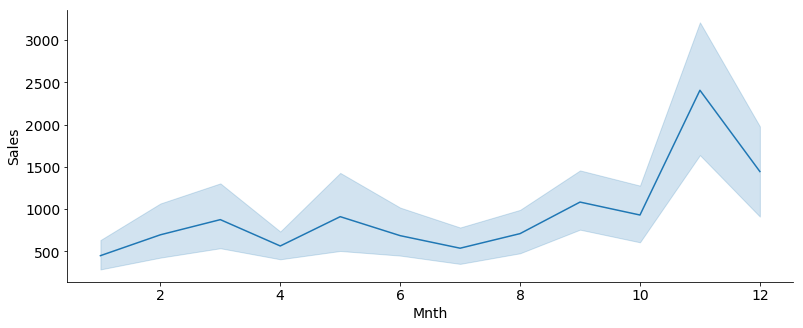

In [9]:
#Creamos una figura 
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(13,5))
#Aquí seleccionamos el grafico de Seaborn que mejor representa la evolución sns.<elegimos el gráfico> ...
# recuerda añadir ax= <nombre de la figura ax> para que nos lo dibuje dentro de la figura

#sns. # completa, primero elige el grafico

sns.lineplot(x='Mnth', y='Sales', data=df_datos, ax=ax)


#plt.close(2)
#Si una vez creado queremos añadir el títutlo descomento el siguiente comando
#ax.set_title("aqui el título")

# En caso que no quepa en horizontal los nombres del eje x se puede poner en vertical
#ax.tick_params(axis='x', labelrotation=45)

In [10]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

### Pregunta: 
¿Con qué detalle queda más claro el gráfico ?
Con día, mes, mes año, año, trimestre...

Una forma de ver la evolución es por años,  en este caso grafica la evolución en barras, cada barra es un año. 

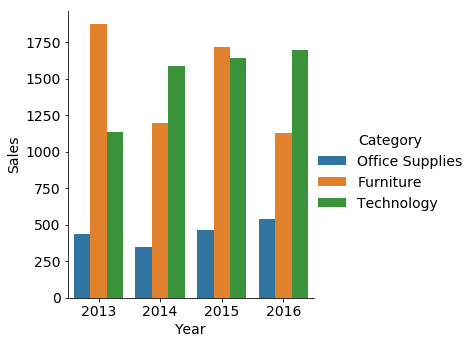

In [11]:
#sns.catplot(x=... , y=....,data=... ,kind='bar', estimator=sum,ci=0)
sns.catplot(x='Year', y='Sales', hue='Category', data=df_datos ,kind='bar',ci=0)


## C1 - ¿Cómo son las ventas por año y   categoría ?

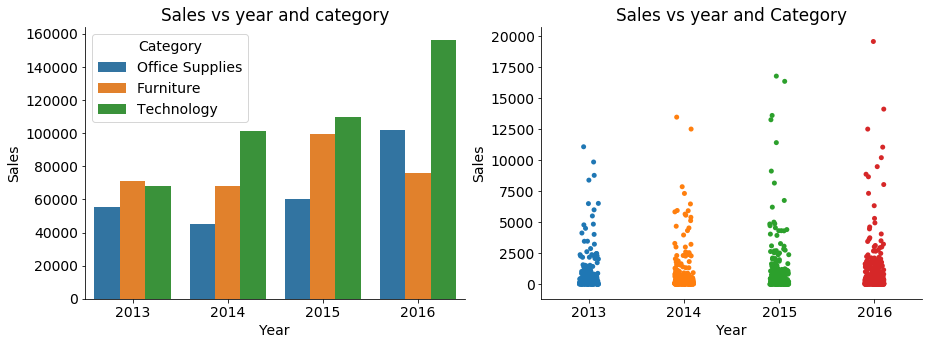

In [14]:
#Hemos creado una figura con dos gráficos para que compares distintos formatos. 
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax0=ax[0]
ax1=ax[1]
# en el primer grafico que crees recuerda poner ax=ax0 para que aparezca a la izquierda
# en el segundo ax=ax1 para que aparezca a la derecha. 
sns.catplot(x='Year', y='Sales', data=df_datos ,kind='bar', estimator=sum,ci=0, ax=ax0, hue='Category') # completa
ax0.set_title('Sales vs year and category')
ax0.set_xlabel('Year')
ax0.set_ylabel('Sales')
#sns.catplot( .... ) # completa
sns.catplot(x='Year', y='Sales', data=df_datos, estimator=sum,ci=0, ax=ax1) # completa
ax1.set_title('Sales vs year and Category')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales')

plt.close(2)
plt.close(3)



Vamos a comparar las ventas de todas las categoría con las ventas respecto a una sóla categoria. 

In [15]:
df_Furniture=df_datos[df_datos['Category']=='Furniture']

In [16]:
df_Furniture.head()

,order_id,Priority,Cust_id,Segment,City,Category,Subcategory,Container,Profit,Quantity,Sales,Mode,order_Dte,Mnth,Year,Quarter,anio_mes
2,88296,High,2579,HomeOffice,Charleston,Furniture,Tables,Jumbo Box,-265,1,204,Delivery Truck,2013-02-01,1,2013,2013Q1,2013/02
8,90166,Critical,896,Corporate,Ryazan,Furniture,Furnishings,Wrap Bag,33,6,52,Regular Air,2013-09-01,1,2013,2013Q1,2013/09
17,90000,Not Specified,1989,HomeOffice,Tijuana,Furniture,Chairs,Jumbo Drum,853,8,2885,Delivery Truck,2013-01-21,1,2013,2013Q1,2013/01
20,86899,High,3155,Corporate,Nantes,Furniture,Chairs,Jumbo Drum,56,4,106,Delivery Truck,2013-01-25,1,2013,2013Q1,2013/01
24,86051,Low,2204,HomeOffice,Davangere,Furniture,Chairs,Jumbo Drum,-152,5,167,Delivery Truck,2013-03-02,2,2013,2013Q1,2013/03


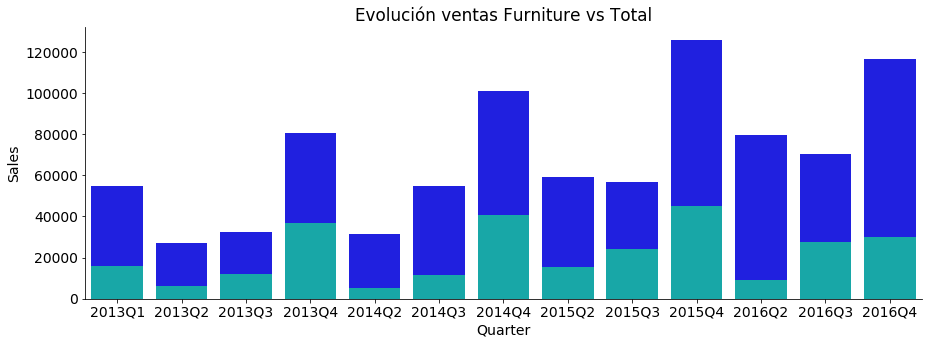

In [19]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))

sns.catplot(x='Quarter', y="Sales",data=df_datos,kind='bar',color="b", estimator=sum,ci=0,ax=ax)
sns.catplot(x='Quarter', y="Sales",data=df_Furniture,kind='bar',color="c", estimator=sum,ci=0,ax=ax)

ax.set_title('Evolución ventas Furniture vs Total')
ax0.set_xlabel('Quarter')
ax0.set_ylabel('Ventas')

plt.close(2)
plt.close(3)


In [20]:
df_Office=df_datos[df_datos['Category']=='Office Supplies']
df_Technology=df_datos[df_datos['Category']=='Technology']

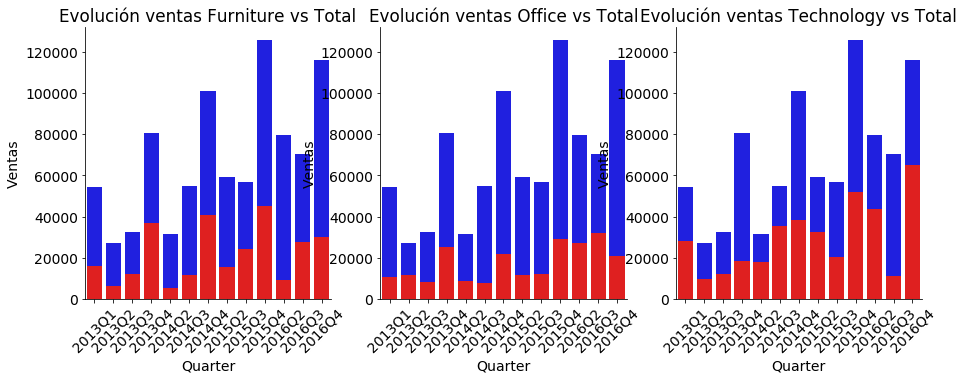

In [21]:

fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
ax0=ax[0]
ax1=ax[1]
ax2=ax[2]
sns.catplot(x='Quarter', y="Sales",data=df_datos,kind='bar',color="b", estimator=sum,ci=0,ax=ax0)
sns.catplot(x='Quarter', y="Sales",data=df_Furniture,kind='bar',color="r", estimator=sum,ci=0,ax=ax0)
ax0.set_title('Evolución ventas Furniture vs Total')
ax0.set_xlabel('Quarter')
ax0.set_ylabel('Ventas')
ax0.tick_params(axis='x', labelrotation=45)

sns.catplot(x='Quarter', y="Sales",data=df_datos,kind='bar',color="b", estimator=sum,ci=0,ax=ax1)
sns.catplot(x='Quarter', y="Sales",data=df_Office,kind='bar',color="r", estimator=sum,ci=0,ax=ax1)
ax1.set_title('Evolución ventas Office vs Total')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Ventas')
ax1.tick_params(axis='x', labelrotation=45)

sns.catplot(x='Quarter', y="Sales",data=df_datos,kind='bar',color="b", estimator=sum,ci=0,ax=ax2)
sns.catplot(x='Quarter', y="Sales",data=df_Technology,kind='bar',color="r", estimator=sum,ci=0,ax=ax2)
ax2.set_title('Evolución ventas Technology vs Total')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Ventas')
ax2.tick_params(axis='x', labelrotation=45)

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)


## Distribuciones- Histogramas

In [22]:
df_diarios=df_datos[df_datos['Sales']>2000]

In [23]:
df_diarios.head()

,order_id,Priority,Cust_id,Segment,City,Category,Subcategory,Container,Profit,Quantity,Sales,Mode,order_Dte,Mnth,Year,Quarter,anio_mes
6,85826,High,2868,Corporate,Aomori,Office Supplies,Accessories,Small Box,3480,6,5509,Regular Air,2013-07-01,1,2013,2013Q1,2013/07
17,90000,Not Specified,1989,HomeOffice,Tijuana,Furniture,Chairs,Jumbo Drum,853,8,2885,Delivery Truck,2013-01-21,1,2013,2013Q1,2013/01
22,91229,Low,2775,Consumer,Milwaukee,Technology,Office Machines,Large Box,2764,8,4513,Regular Air,2013-01-29,1,2013,2013Q1,2013/01
23,40101,Low,1723,Corporate,Hong Kong,Technology,Peripherals,Small Box,13,46,2184,Express Air,2013-01-30,1,2013,2013Q1,2013/01
29,87160,High,2778,Consumer,Burlington,Technology,Telephones,Small Box,107,12,2478,Express Air,2013-10-02,2,2013,2013Q1,2013/10


### Grafico de frecuencia - Histograma de Unidades - Quantity

Text(0.5,1,'Boxplot Quantity')

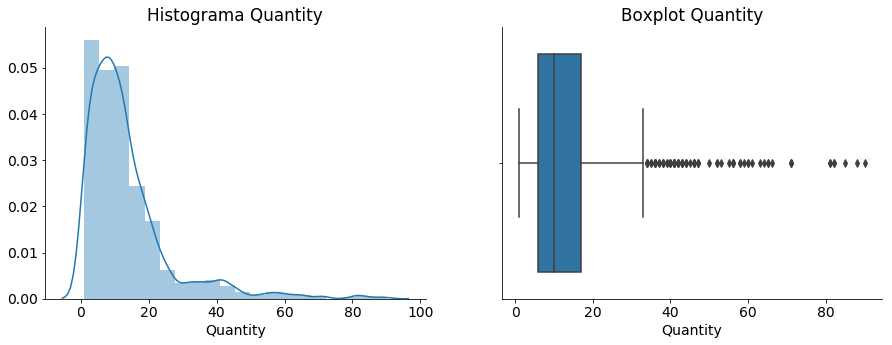

In [24]:
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax0=ax[0]
ax1=ax[1]
# sns. displot y sns.boxplot para ver las similitudes de los gráficos

sns.distplot(df_datos.Quantity, hist=True, bins=20, ax=ax0, kde=True)
ax0.set_title('Histograma Quantity')
sns.boxplot(x='Quantity', data=df_datos, ax=ax1)
ax1.set_title('Boxplot Quantity')


#### La distribución de las ventas. 
Si repetimos el gráfico de arriba con Sales, veremos que más del 50% de las ventas están en el primer intervalo Hay muchas 0rdenes de venta de menos de 2500 euros y muy pocas de más de 2500 euros. 
Veamos si queda mejor agrupando en vez de por ordenes de venta por meses. 

In [25]:
fecha=pd.Grouper(key='order_Dte', freq='M')

campos_filas=[fecha,]

campos_valores=['Sales']
agregados={np.sum}
ventas=pd.pivot_table(df_datos,
                       index=campos_filas,
#                      columns=campos_columnas,
                       values=campos_valores, # en caso de utilizar la opción 2 asterisca esta linea
                       aggfunc=agregados)

In [26]:
ventas.head()

,Sales
,sum
order_Dte,
2013-01-31,19419
2013-02-28,7645
2013-03-31,22483
2013-04-30,12526
2013-05-31,18843


Text(0.5,1,'Boxplot Distribución ventas')

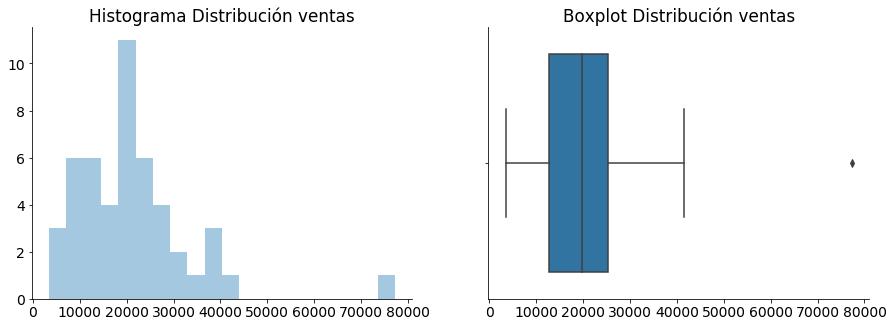

In [27]:
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax0=ax[0]
ax1=ax[1]
# Completa la distribución de ventas, histograma y boxplot con el nuevo dataframe. 
sns.distplot(ventas.Sales, hist=True, bins=20, ax=ax0, kde=False)
ax0.set_title('Histograma Distribución ventas')
sns.boxplot(x='Sales', data=ventas, ax=ax1)
ax1.set_title('Boxplot Distribución ventas')


### Distribución de unidades por año y categoría 

Elegir el de los siguentes graficos comentados cual representa mejor la evolución 
Elegido el segundo gráfico debdio a la facilidad de comparación

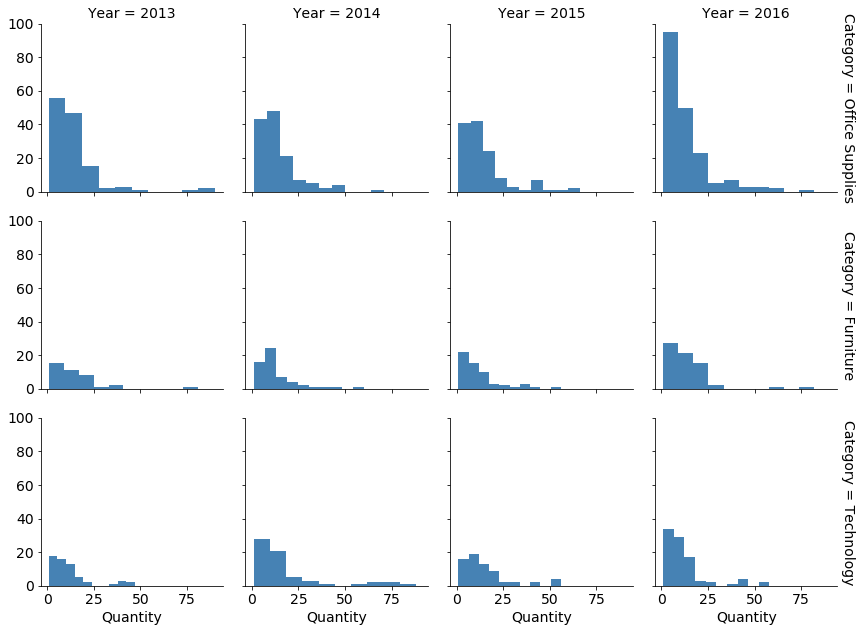

In [28]:
#g=sns.FacetGrid(df_datos, row="Year", col="Category", margin_titles=True)
g=sns.FacetGrid(df_datos, row="Category", col="Year", margin_titles=True)
g.map(plt.hist, "Quantity", color="steelblue")

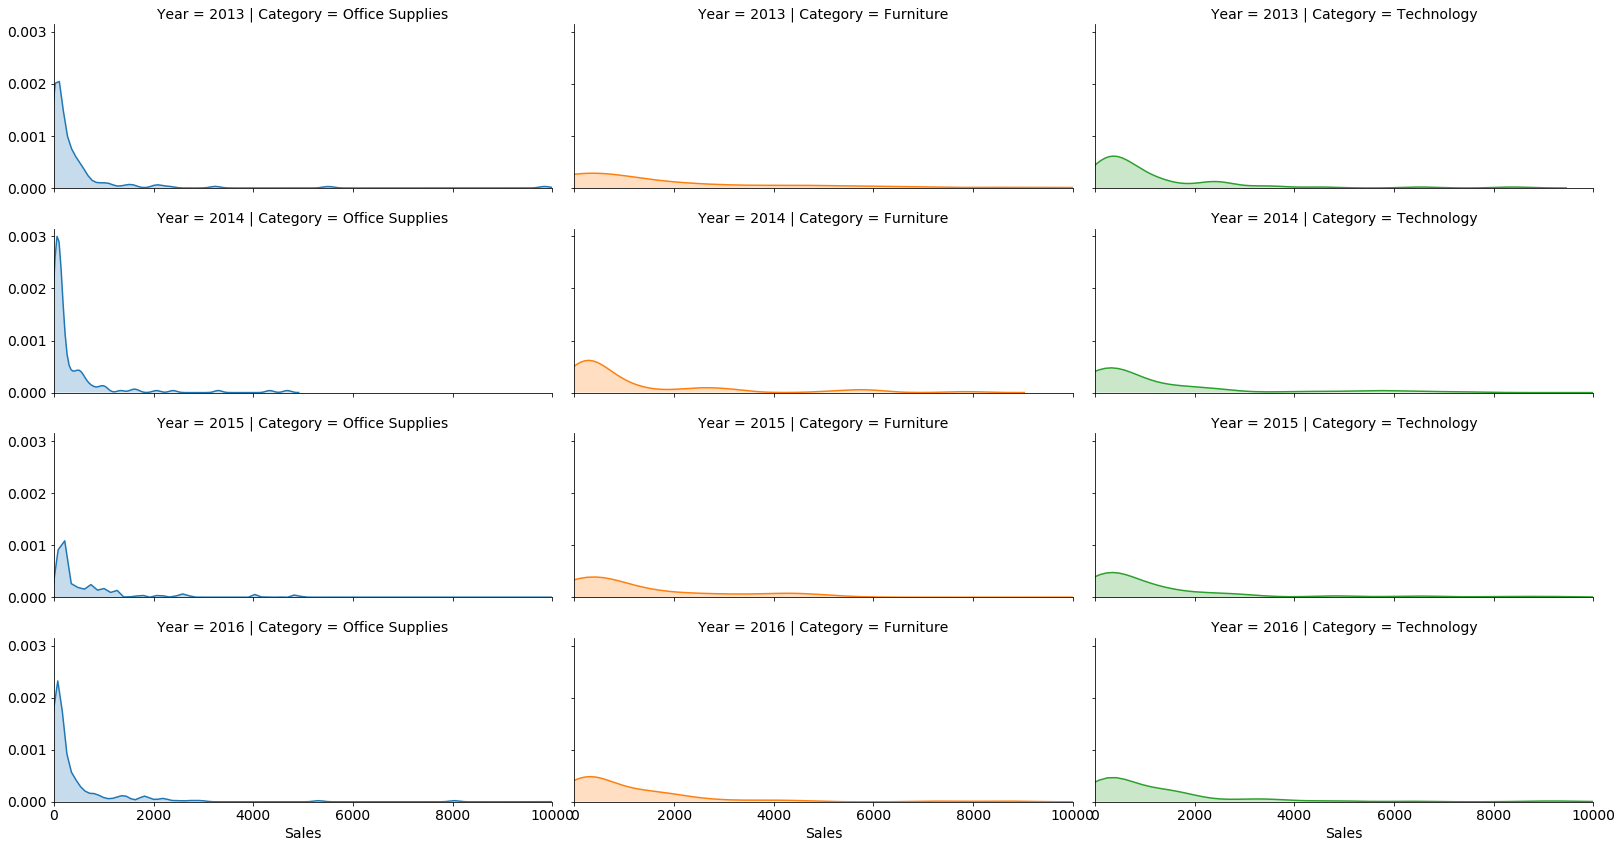

In [29]:
# Otra forma de representación 
fg = sns.FacetGrid(df_datos, col="Category", row="Year", hue="Category", aspect=2.5)
fg.map(sns.kdeplot, "Sales", shade=True)
fg.set(xlim=(0, 10000));

## Q2 - Correlaciones 

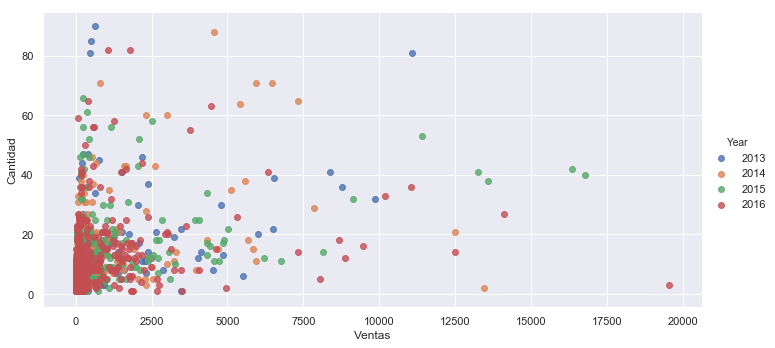

In [30]:

sns.set(style="darkgrid")
g = sns.lmplot(x="Sales", y="Quantity",data=df_datos, aspect=2,hue='Year', ci=0,fit_reg=False)
g.set_axis_labels("Ventas","Cantidad")

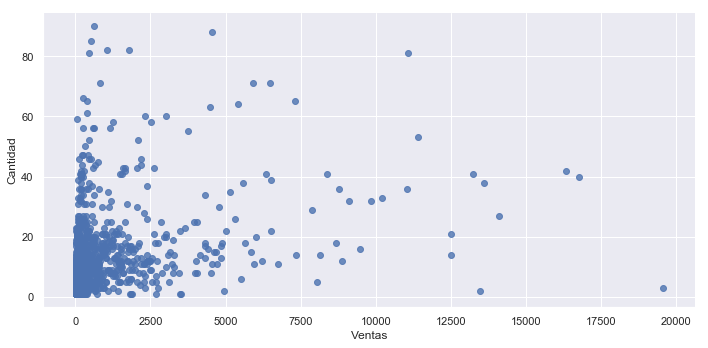

In [31]:

sns.set(style="darkgrid")
g = sns.lmplot(x="Sales", y="Quantity",data=df_datos, aspect=2, ci=0,fit_reg=False)
g.set_axis_labels("Ventas","Cantidad")

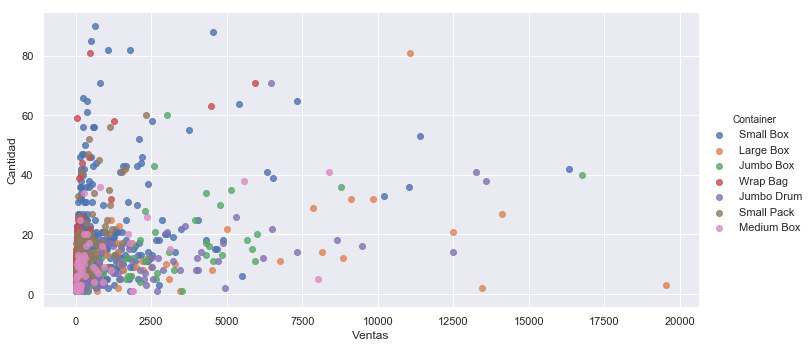

In [32]:

sns.set(style="darkgrid")
g = sns.lmplot(x="Sales", y="Quantity",data=df_datos, aspect=2,hue='Container', ci=0,fit_reg=False)
g.set_axis_labels("Ventas","Cantidad")

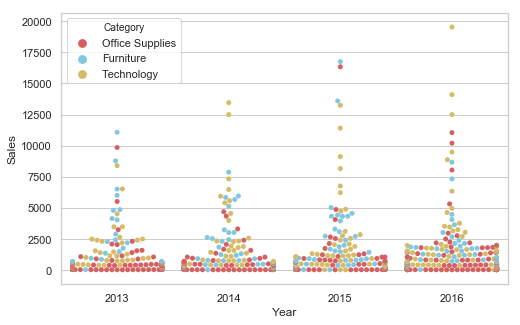

In [33]:
sns.set(style="whitegrid", palette="muted")
sns.swarmplot('Year', y= 'Sales', hue = 'Category',
              palette=["r", "c", "y"], data=df_datos)

En este gráfico, podemos intuir cómo evoluciona y también contestar a la pregunta según el año, pero es bastante complicado decir a priori la evolución de cada tipo de producto. Probaremos con el gráfico de violín

Text(0.5,1,'Evolución de las ventas por categoría')

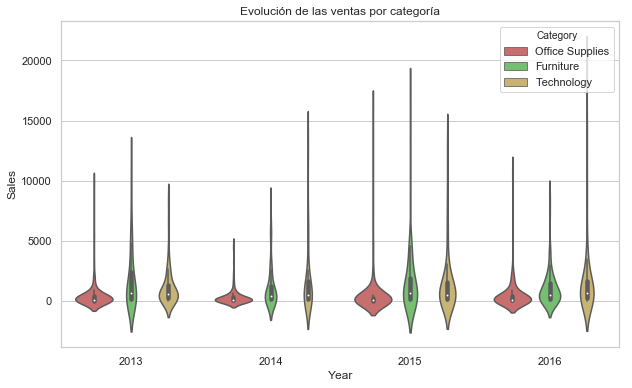

In [34]:
# creamos un violin plot de ventas 'Sales' por año y hue="Category"
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

sns.violinplot('Year', y='Sales', hue='Category', palette=['r','g','y'], data=df_datos)

ax.set_title('Evolución de las ventas por categoría')

Aunque este gráfico, es más intuitivo que el swarm y nos permite responder a la pregunta, el tipo de gráfico que considero que da más información y es más sencillo de interpretar es el de barras

Text(0.5,1,'Evolución de las ventas por categoría')

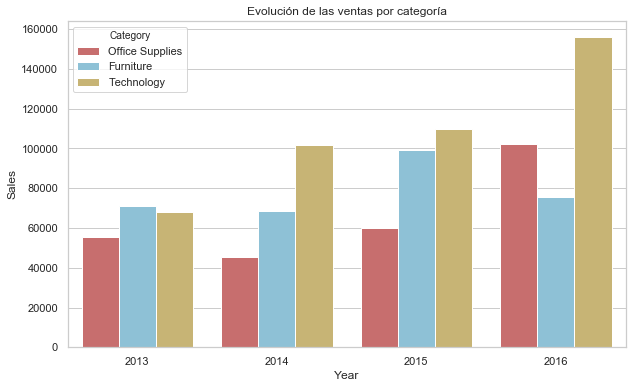

In [35]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

sns.set(style="whitegrid", palette="muted")
sns.barplot('Year', y= 'Sales', hue = 'Category',estimator=sum,
              palette=["r", "c", "y"], data=df_datos, ci=0, ax=ax)

ax.set_title('Evolución de las ventas por categoría')

In [36]:
#A partir de esta primera representación, ya podemos observar/interpretar cosas. Por lo que parece las ventas tienden a subir en
#sobre todo en los últimos meses del año(posible estacionalidad en las ventas)

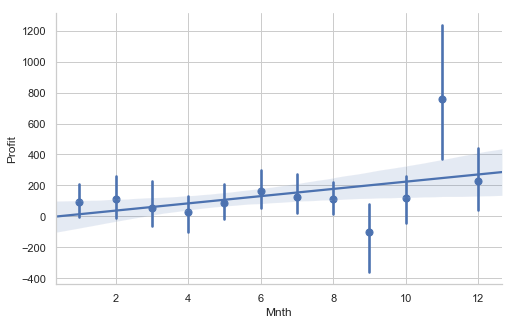

In [37]:
#¿En qué meses del año obtengo mayores beneficios? Distribución del beneficio obtenido por meses
sns.set(style="whitegrid")
sns.regplot("Mnth","Profit",data=df_datos, x_estimator=np.mean)
sns.despine();

## C2 - PARTES 

¿Qué categoría de producto es la más vendida? 


Text(0.5,1,'Boxplot Distribución ventas por categoría')

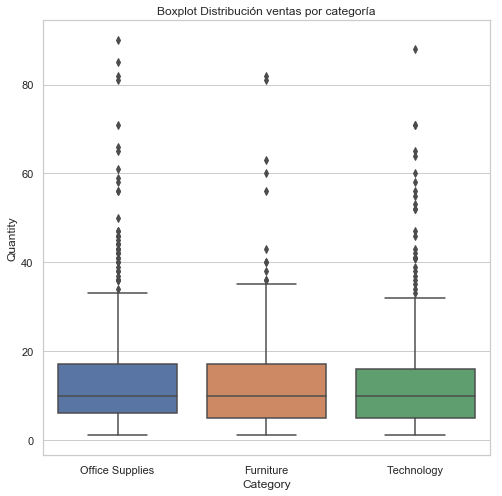

In [38]:
#Por cantidad boxplot category y quantity 
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))
sns.boxplot(x='Category', y='Quantity', data=df_datos, ax=ax)
ax.set_title('Boxplot Distribución ventas por categoría')

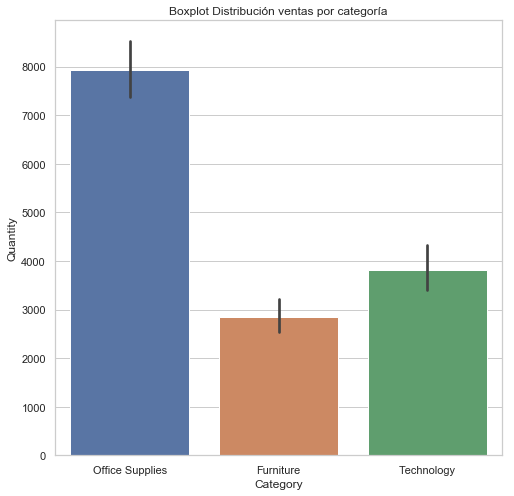

In [39]:
# Por barras catplot. 
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))
sns.catplot(x='Category', y='Quantity', data=df_datos, kind='bar', estimator=sum, ci=95, ax=ax)
ax.set_title('Boxplot Distribución ventas por categoría')

plt.close(2)

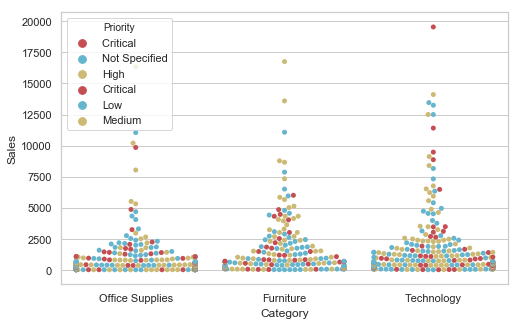

In [40]:
#Volumen de ventas por categoría y prioridad
sns.swarmplot(x="Category", y="Sales", hue="Priority", data=df_datos,  palette=["r", "c", "y"])

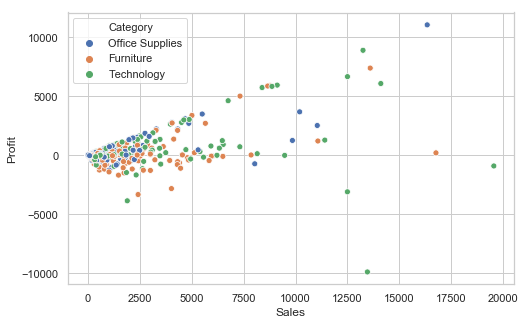

In [41]:
#¿Qué relación hay entre volumen de venta y el beneficio obtenido para cada tipo de artículo?
ax = sns.scatterplot(x="Sales", y="Profit", hue="Category",sizes=(10, 200),
                     data=df_datos)

## Anexo- C3 - COMPARATIVAS

¿Cómo evoluciona cada categoría de producto en estos **dos** ultimos años?

En este ejercicio, simplemente vamos a filtrar por registros cuyo año de entrada sean superiores a 2014. 
En primer lugar, representamos con un gráfico de violin donde para cada tipo de producto, indicamos la comparativa de ventas en 2015 y 2016**

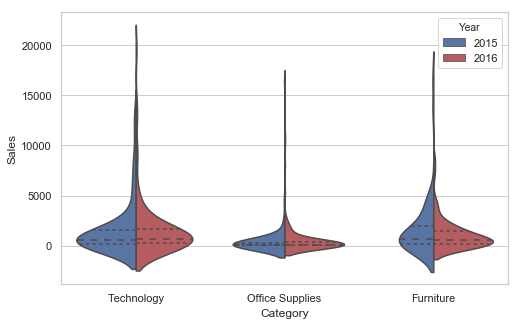

In [44]:
data_path = 'orders.csv'
df_datos = pd.read_csv(data_path)

df_2_Sb = df_datos[(df_datos['Year'] > 2014)]

sns.violinplot(x='Category', y='Sales', hue='Year',
               split=True, inner="quart",
               palette={2015: "b", 2016: "r"},
               data=df_2_Sb)
#sns.despine(left=True)
#Con el plot violín se puede observar la comparación en la distribución de las ventas, así como la cantidad en 
#cada una de ellas - los grosores maoyres indican mas ventas de una categoía esp

In [45]:
#Hago un filtro para obtener solo los datos de los últimos dos años
ultimosanios=df_datos[df_datos.Year.isin([2015, 2016])]

In [46]:
ultimosanios.Year.value_counts()

2016    348
2015    255
Name: Year, dtype: int64

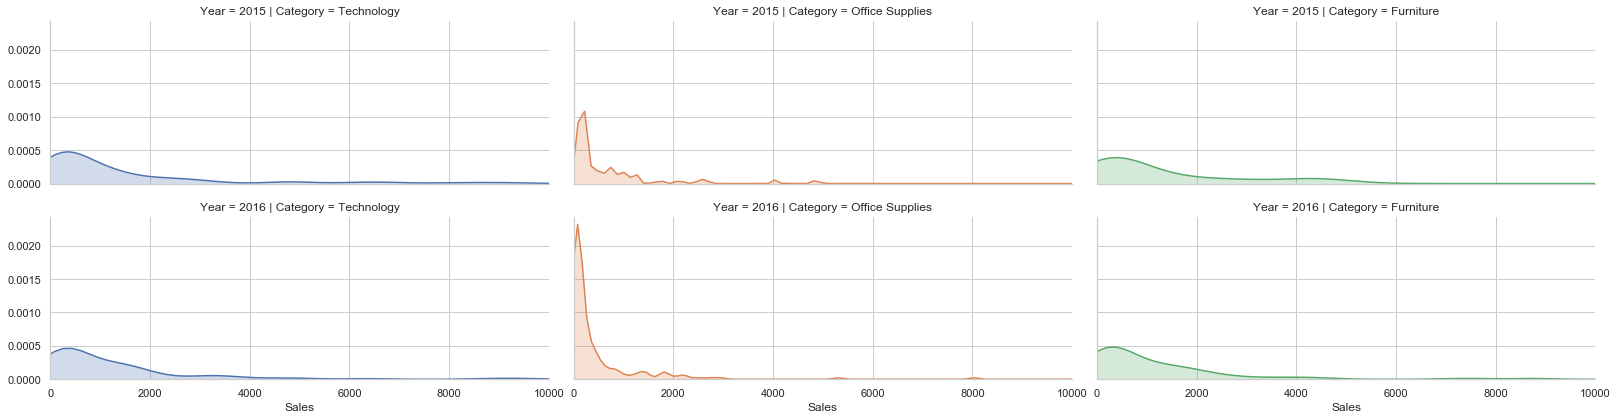

In [47]:
#Utilizamos nuestro gráfico anterior de densidad de población con el dataframe ultimosnios --> Distribución de ventas por categoría
fg = sns.FacetGrid(ultimosanios, col="Category", row="Year", hue="Category", aspect=2.5)
fg.map(sns.kdeplot, "Sales", shade=True)
fg.set(xlim=(0, 10000));

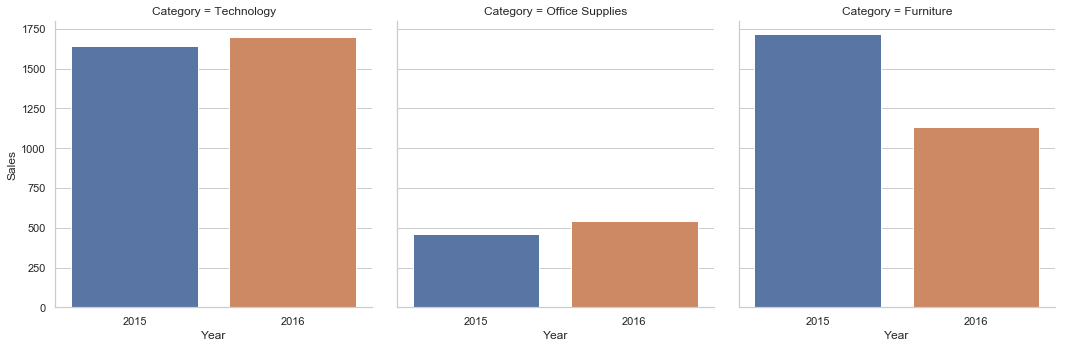

In [48]:
#A través de está visualización se ve mejor las diferencias de un año vs el otro.

sns.catplot(x="Year", y="Sales",col="Category",data=ultimosanios, kind="bar", ci=0)

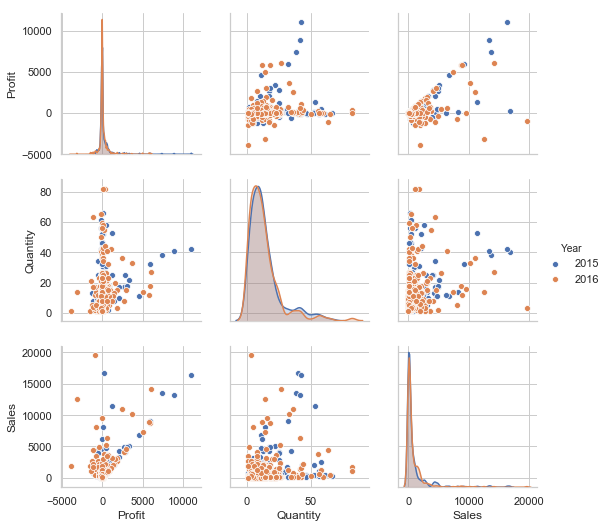

In [49]:
#df1 = ultimosanios[['Profit','Quantity','Sales','Year']]
#sns.pairplot(ultimosanios[['Profit','Quantity','Sales']], hue=ultimosanios.Year)
sns.pairplot(ultimosanios,vars=['Profit','Quantity','Sales'], hue='Year')